## Ex. 1-2) Modify colors using HSV (hue, saturation, and value) color space
Sometimes it is easier to convert pixel valeus from RGB to HSV and modify them. Write a code that increaess saturation values of an input image to 1.2 times. See https://www.rapidtables.com/convert/color/index.html for converting equations.
<img src="fig/rgb2hsv.png" style="width:400px">

### Type your code below.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from time import time

img_path = "./in/kid.png"

img = Image.open(img_path)

img.show()
img_arr = np.asarray(img)
print(img_arr.shape)
print(img_arr.dtype)

(504, 378, 3)
uint8


In [2]:
# In Python, dictionary can hash functions! We will use that.

start = time()

def calc_r(cmax, g, b, diff):
    h = (60 * ((g - b) / diff) + 360) % 360
    s = (diff / cmax) * 100
    v = cmax * 100
    return h, s, v


def calc_g(r, cmax, b, diff):
    h = (60 * ((b - r) / diff) + 120) % 360
    s = (diff / cmax) * 100
    v = cmax * 100
    return h, s, v


def calc_b(r, g, cmax, diff):
    h = (60 * ((r - g) / diff) + 240) % 360
    s = (diff / cmax) * 100
    v = cmax * 100
    return h, s, v


rgb_to_calc = {0: calc_r, 1: calc_g, 2: calc_b}

In [3]:
hsv_img = img_arr / 255
cmaxes = np.amax(hsv_img, 2)
cminis = np.amin(hsv_img, 2)
diffs = cmaxes - cminis

h, w, _ = hsv_img.shape
for i in range(h):
    for j in range(w):
        if cmaxes[i, j] < 1e-4:
            h, s, v = 0, 0, 0
        elif diffs[i, j] < 1e-4:
            h, s, v = 0, 0, cmaxes[i, j] * 100
        else:
            max_idx = np.where(abs(hsv_img[i, j] - cmaxes[i, j]) < 1e-5)[0][0]
            h, s, v = rgb_to_calc[max_idx](*hsv_img[i, j], diffs[i, j])
            s = 1.2 * s if 1.2 * s < 100 else 100
        hsv_img[i, j] = np.array([h, s, v])
print(f"Time required for rgb_to_hsv conversion:\n\t{round((time()-start), 4)}")

Time required for rgb_to_hsv conversion:
	2.3748


In [4]:
def calc_h0(x, c):
    r0, g0, b0 = c, x, 0
    return r0, g0, b0


def calc_h1(x, c):
    r0, g0, b0 = x, c, 0
    return r0, g0, b0


def calc_h2(x, c):
    r0, g0, b0 = 0, c, x
    return r0, g0, b0


def calc_h3(x, c):
    r0, g0, b0 = 0, x, c
    return r0, g0, b0


def calc_h4(x, c):
    r0, g0, b0 = x, 0, c
    return r0, g0, b0


def calc_h5(x, c):
    r0, g0, b0 = c, 0, x
    return r0, g0, b0


h6_to_calc = {0: calc_h0, 1: calc_h1, 2: calc_h2, 3: calc_h3, 4: calc_h4, 5: calc_h5}

In [5]:
rgb_img = np.empty_like(hsv_img)
c_arr = hsv_img[:, :, 1] * hsv_img[:, :, 2] /1e4
x_arr = c_arr * (1 - np.abs((hsv_img[:, :, 0] / 60 % 2 - 1)))
m_arr = (hsv_img[:, :, 2] / 100) - c_arr

h, w, _ = rgb_img.shape
for i in range(h):
    for j in range(w):
        h = hsv_img[i, j, 0]
        r0, g0, b0 = h6_to_calc[h//60](x_arr[i,j], c_arr[i,j])
        rgb_img[i, j] = np.array([r0, g0, b0])
rgb_img = (rgb_img+np.dstack([m_arr]*3))*255

print(np.amax(np.amax(rgb_img, 0), 0))
np.clip(rgb_img, 0, 255)

print(rgb_img.shape)

[255. 255. 255.]
(504, 378, 3)


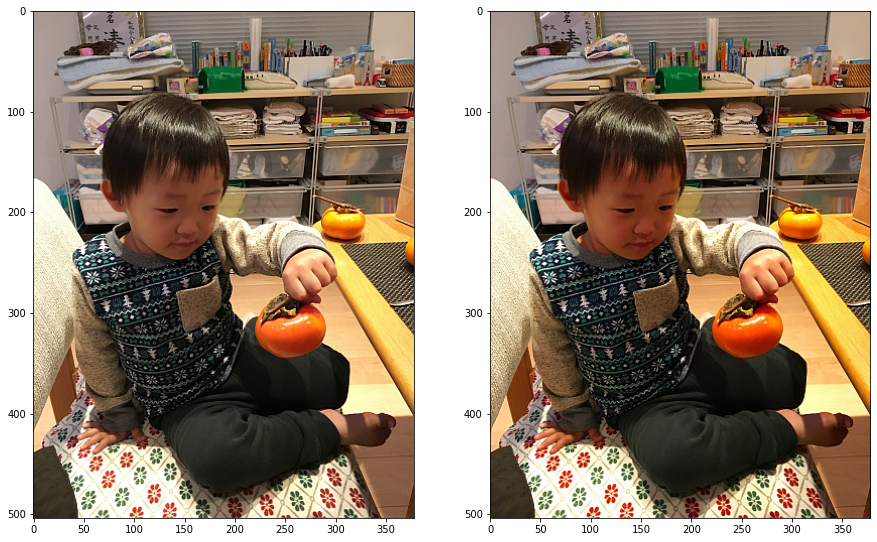

Total time required:
	3.3645


In [6]:
# save and also show results
results = Image.fromarray(np.uint8(rgb_img))
results.save(f"./ex1-1-result/sat_mod.png")

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 2, 1)
plt.imshow(img)

# display the new image
fig.add_subplot(1, 2, 2)
plt.imshow(results)

plt.show(block=True)
print(f"Total time required:\n\t{round((time()-start), 4)}")

<h3> Runtime comparison </h3>
By comparing above and below results, we can see that using hash maps instead of conditions saves a lot of time (although we are sacrificing little bit of memory).
To sum up:
<ul>
    <li>RGB_to_HSV conversion: 2.7122 -> 2.3748 </li>
    <li>Total time required: 3.3645 -> 7.0528 </li>
</ul>

Example code:

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

in_img_path = "in/kid.png"
img = Image.open(in_img_path)
pix = np.asarray(img)

Time required for rgb_to_hsv conversion:
	2.7122


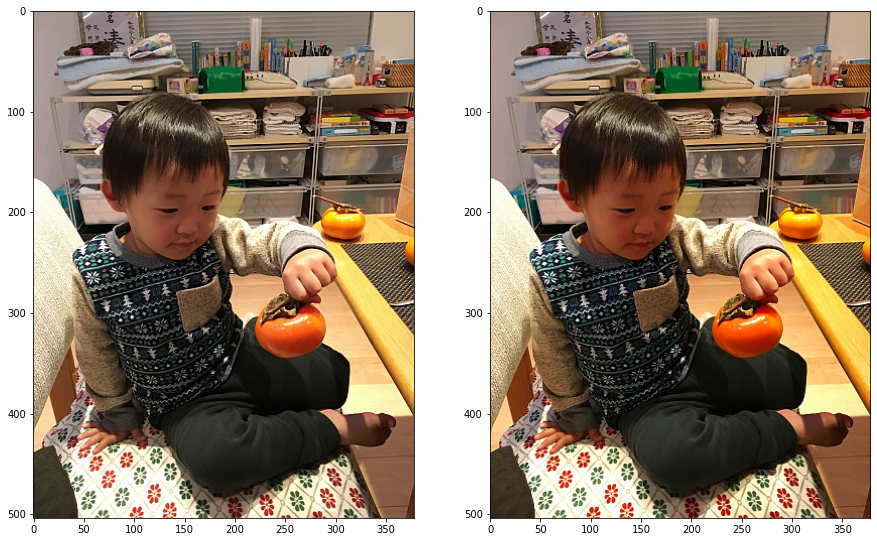

Total time required:
	7.0528


In [8]:
start = time()

values = np.float32(pix)
values = values / 255.0
hsv = np.copy(values)
result = np.copy(values)

max = np.amax(values, 2)
min = np.amin(values, 2)
delta = max - min

h = pix.shape[0]
w = pix.shape[1]

# Convert to HSV and scale the saturation by 1.2
for i in range(0, h):
    for j in range(0, w):
        if delta[i, j] < 1e-4:
            hue = 0
        else:
            # if max = red
            if abs(max[i, j] - values[i, j, 0]) < 1e-5:
                hue = 60 * (((values[i, j, 1] - values[i, j, 2]) / delta[i, j]) % 6)
            else:
                # if max = green
                if abs(max[i, j] - values[i, j, 1]) < 1e-5:
                    hue = 60 * ((values[i, j, 2] - values[i, j, 0]) / delta[i, j] + 2)
                else:
                    # max = blue
                    hue = 60 * ((values[i, j, 0] - values[i, j, 1]) / delta[i, j] + 4)
        if max[i, j] < 1e-5:
            saturation = 0
        else:
            saturation = delta[i, j] / max[i, j]

        hsv[i, j, 0] = hue
        hsv[i, j, 2] = max[i, j]
        if max[i, j] > 0.1:
            hsv[i, j, 1] = saturation * 1.2  # multiply by a factor of 1.2
        else:
            hsv[i, j, 1] = saturation
        # you need to clip the values, othewise you will see unwanted noise
        if saturation * 1.2 > 1.0:
            hsv[i, j, 1] = 1.0

print(f"Time required for rgb_to_hsv conversion:\n\t{round((time()-start), 4)}")
# Convert back to RGB
for i in range(0, h):
    for j in range(0, w):
        hue = hsv[i, j, 0]
        saturation = hsv[i, j, 1]
        value = hsv[i, j, 2]
        c = value * saturation
        x = c * (1 - abs((hue / 60) % 2 - 1))
        m = value - c
        if 0 <= hue and hue < 60:
            result[i, j, 0] = c
            result[i, j, 1] = x
            result[i, j, 2] = 0
        else:
            if 60 <= hue and hue < 120:
                result[i, j, 0] = x
                result[i, j, 1] = c
                result[i, j, 2] = 0
            else:
                if 120 <= hue and hue < 180:
                    result[i, j, 0] = 0
                    result[i, j, 1] = c
                    result[i, j, 2] = x
                else:
                    if 180 <= hue and hue < 240:
                        result[i, j, 0] = 0
                        result[i, j, 1] = x
                        result[i, j, 2] = c
                    else:
                        if 240 <= hue and hue < 300:
                            result[i, j, 0] = x
                            result[i, j, 1] = 0
                            result[i, j, 2] = c
                        else:
                            if 300 <= hue and hue < 360:
                                result[i, j, 0] = c
                                result[i, j, 1] = 0
                                result[i, j, 2] = x
        for k in range(0, 3):
            result[i, j, k] = (result[i, j, k] + m) * 255

# you probably need clipping
np.clip(result, 0, 255)

# save and also show results
results = Image.fromarray(np.uint8(result))
results.save("sat_mod.png")

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1, 2, 1)
plt.imshow(img)

# display the new image
fig.add_subplot(1, 2, 2)
plt.imshow(results)

plt.show(block=True)

print(f"Total time required:\n\t{round((time()-start), 4)}")